# Курс "Программирование на языке Python. Уровень 4. Анализ и визуализация данных на языке Python. Библиотеки numpy, pandas, matplotlib"

## Модуль 6. Агрегирование и групповые операции в pandas

1. Группировка данных
2. Агрегирование данных
3. Групповые операции над данными
4. Групповые операции и статистический анализ
5. Сводные таблицы
6. Визуализация данных средствами pandas



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 10.0)
%matplotlib inline

### Группировка данных

Под группировкой будем понимать разделение объекта pandas на части по одному или нескольким признакам. Такое объединение данных применяется для:
 - вычисления групповых статстик (минимум, максимум, сумма, и т.д.)
 - применения групповых преобразований
 - вычисления сводных таблиц и кросстабулирования

В pandas для группировки используется функция ```groupby()```. Эта функция сама по себе ничего не вычисляет,кроме промужуточных данных о ключах, по которым производится объедиение. Функция возвращает объект, у которого есть методы для агрегатных вычислений.
 

In [10]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.731324,1.286877
1,a,two,-0.208101,-0.895879
2,b,one,0.515720,-0.403155
3,b,two,0.256534,0.912170
4,a,one,-1.105779,1.995396


In [3]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [4]:
grouped.mean()

key1
a   -0.908427
b    0.121240
Name: data1, dtype: float64

Для группировки можно использовать несколько объектов Series:

In [5]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -1.147055
      two    -0.431173
b     one    -0.283658
      two     0.526137
Name: data1, dtype: float64

...или выполнять группировку по всему DataFrame'у, передав ключи в виде списка:

In [6]:
# это выражение должно вывести тот же результат, что и выражение выше
means = df.groupby(['key1', 'key2'])['data1'].mean()
means

key1  key2
a     one    -1.147055
      two    -0.431173
b     one    -0.283658
      two     0.526137
Name: data1, dtype: float64

...также можно указать один ключ. Обратите внимание: куда пропал ключ 'key2'?

In [7]:
means = df.groupby('key1').mean()
means

,data1,data2
key1,,
a,-0.908427,0.108046
b,0.121240,0.372628


Группировку можно проводить по любой оси. Например, сгруппируем данные по типу:

In [8]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [9]:
grouped = df.groupby(df.dtypes, axis=1)
grouped.size()

float64    2
object     2
dtype: int64

Объект SeriesGroupBy поддерживает итерирование. Так, группы можно обходить в цикле ```for```. При этом итератор возвращает значение ключа и объект DataFrame группы:

In [10]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.795215  0.725507
1    a  two -0.431173  0.143660
4    a  one -1.498894 -0.545029
b
  key1 key2     data1     data2
2    b  one -0.283658  0.051515
3    b  two  0.526137  0.693741


__ЗАДАНИЕ__ Сгруппируйте датафрейм df по признакам key1 и key2 и обратите внимание, что вернет первый параметр итератора.

In [11]:
# ваш код здесь


('a', 'one')
  key1 key2     data1     data2
0    a  one -0.795215  0.725507
4    a  one -1.498894 -0.545029
('a', 'two')
  key1 key2     data1    data2
1    a  two -0.431173  0.14366
('b', 'one')
  key1 key2     data1     data2
2    b  one -0.283658  0.051515
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.526137  0.693741


Также для группировки можно использовать словари и массивы. Рассмотрим пример:

In [12]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Alex', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,0.349579,0.354928,0.182284,0.162414,-0.043432
Steve,0.596304,1.657034,0.590032,-0.876054,-2.330040
Alex,0.670197,-0.735183,-0.078774,0.759392,0.222928
Jim,-1.530489,-0.044874,-0.130157,-0.377796,0.392383
Travis,0.586194,0.244526,0.195459,0.260356,-1.194289


In [13]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [14]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,0.344698,0.661075
Steve,-0.286022,-0.076702
Alex,0.680618,0.157942
Jim,-0.507952,-1.182980
Travis,0.455815,-0.363569


Также можно использовать для группировки функцию (например, ```len()```):

In [15]:
people.groupby(len).sum()

,a,b,c,d,e
3,-1.180909,0.310054,0.052127,-0.215382,0.348951
4,0.670197,-0.735183,-0.078774,0.759392,0.222928
5,0.596304,1.657034,0.590032,-0.876054,-2.330040
6,0.586194,0.244526,0.195459,0.260356,-1.194289


#### Множественный индекс

Вспомним группировку из предыдущего примера. Обратите внимание на индекс:

In [16]:
means = df.groupby(['key1', 'key2'])['data1'].mean()
means

key1  key2
a     one    -1.147055
      two    -0.431173
b     one    -0.283658
      two     0.526137
Name: data1, dtype: float64

DataFrame с множественным индексом можно задать явно:

In [17]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    ['specialized', 'santa cruz', 'gt', 'fuji', 'ninjago']],
                                    names=['cty', 'brand'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty            US                             JP          
brand specialized santa cruz        gt      fuji   ninjago
0       -1.479037   0.560004 -1.043538 -1.553655  1.065418
1       -0.341813  -0.055337 -1.722807 -0.381034 -0.556211
2       -0.261990   0.351092  1.458264 -1.098465  0.169289
3       -0.230333   0.762401 -0.368440  2.888257 -0.024908

Для группировки указываем уровень в параметре ```level=```.

In [20]:
hier_df.groupby(level='brand', axis=1).sum()

brand,fuji,gt,ninjago,santa cruz,specialized
0,-1.553655,-1.043538,1.065418,0.560004,-1.479037
1,-0.381034,-1.722807,-0.556211,-0.055337,-0.341813
2,-1.098465,1.458264,0.169289,0.351092,-0.261990
3,2.888257,-0.368440,-0.024908,0.762401,-0.230333


### Агрегирование данных

Список оптимизированных агрегатных функций pandas:

- ```count()``` - количество отличных от NaN значений в группе
- ```sum()``` - сумма
- ```mean()``` - среднее (также по отличным от NaN значениям)
- ```median()``` - медиана (тоже по отличным от NaN)
- ```var()``` - дисперсия
- ```min()``` - минимум
- ```max()``` - максимум
- ```prod()``` - произведение
- ```first()``` - первый отличный от NaN в группе
- ```last()``` - последний отличный от NaN в группе

Также можно написать свою собственную функцию и передать ее в функцию ```agg()```. Она будет принимать на вход объект Series и возращать скалярное значение.


In [21]:
df

,key1,key2,data1,data2
0,a,one,-0.795215,0.725507
1,a,two,-0.431173,0.143660
2,b,one,-0.283658,0.051515
3,b,two,0.526137,0.693741
4,a,one,-1.498894,-0.545029


In [22]:
def mean_median(arr):
    return arr.mean() - arr.median()
df.groupby('key1').agg(mean_median)

,data1,data2
key1,,
a,-0.113212,-0.035614
b,0.000000,0.000000


Также в ```agg()``` можно передавать список функций, стандартные функции передаются по именам:

In [23]:
df.groupby('key1').agg(['mean', 'median', mean_median])

data1                           data2                      
          mean    median mean_median      mean    median mean_median
key1                                                                
a    -0.908427 -0.795215   -0.113212  0.108046  0.143660   -0.035614
b     0.121240  0.121240    0.000000  0.372628  0.372628    0.000000

In [24]:
df.groupby('key1').agg([("Среднее", 'mean'), ("Медиана", 'median'), ("Среднее-медиана", mean_median)])

data1                               data2                          
       Среднее   Медиана Среднее-медиана   Среднее   Медиана Среднее-медиана
key1                                                                        
a    -0.908427 -0.795215       -0.113212  0.108046  0.143660       -0.035614
b     0.121240  0.121240        0.000000  0.372628  0.372628        0.000000

__ЗАДАНИЕ__: Для набора данных "чаевые" посчитайте следующее:
 - общую сумму чаевых за каждый день
 - средний процент для групп в зависимости от пола, а потом и дня
 - выведите минимальный и максимальный процент чаевых в зависимости от дня и времени

In [25]:
tips = pd.read_csv('data/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [27]:
# ваш код здесь
tips.groupby('day')['tip'].sum()

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

In [29]:
tips.groupby(['sex', 'day'])['tip_pct'].mean()

sex     day 
Female  Fri     0.199388
        Sat     0.156470
        Sun     0.181569
        Thur    0.157525
Male    Fri     0.143385
        Sat     0.151577
        Sun     0.162344
        Thur    0.165276
Name: tip_pct, dtype: float64

### Групповые операции над данными

Функция apply позволяет применить заданную функцию к каждой группе. И более того, она может вернуть векторное значение.

In [30]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column, ascending=False)[:n]
top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525


Так мы можем вывести самых щедрых на чаевые из групп "курящие/некурящие":

In [31]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525

Параметры к нашей функции можно передать через ту же функцию ```apply()```

In [32]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

Избавиться от индекса в выводе данных можно с помощью параметра ```group_keys=False```

In [33]:
tips.groupby(['smoker', 'day'], group_keys=False).apply(top, n=1, column='total_bill')

,total_bill,tip,sex,smoker,day,time,size,tip_pct
94,22.75,3.25,Female,No,Fri,Dinner,2,0.142857
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
156,48.17,5.00,Male,No,Sun,Dinner,6,0.103799
142,41.19,5.00,Male,No,Thur,Lunch,5,0.121389
95,40.17,4.73,Male,Yes,Fri,Dinner,4,0.117750
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.077178
197,43.11,5.00,Female,Yes,Thur,Lunch,4,0.115982


__ЗАДАНИЕ__: В заданном ниже датасете посчитайте средний балл по фамилиям студентов:

In [11]:
students = ['Вася Иванов', 'Витя Петров', 'Таня Текслер', 'Игорь Иванов' \
            , 'Петр Текслер', 'Игорь Иванов', 'Андрей Иванов', 'Ольга Петрова']
marks = [4, 4, 5, 3, 4, 5, 5, 3]
df_marks = pd.DataFrame( {'student': students, 'mark': marks} )

# ваш код здесь

### Групповые операции при статистическом анализе

Пример для вычисления группового взвешенного среднего.

In [41]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,0.247625,0.701110
1,a,-0.394511,0.174506
2,a,0.179992,0.839269
3,a,-0.331268,0.094803
4,b,-1.476244,0.002622
5,b,0.148227,0.822465
6,b,-1.107937,0.236785
7,b,0.949643,0.734660


In [42]:
grouped = df.groupby('category')
def get_wavg(g):
    return np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.124013
b    0.308017
dtype: float64

Кореляция.

In [43]:
close_px = pd.read_csv('data/stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [44]:
rets = close_px.pct_change().dropna() # сбросим незаполненные данные и посчитаем изменения в процентном отношении
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Сводные таблицы

Для построения сводных таблиц используется метод ```pivot_table()```. По умолчанию она считает средние по каждому показателю.

Рассмотрим на примере "чаевых":

In [45]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [46]:
tips.pivot_table(['tip_pct', 'size'], index=['day', 'time'],
                 columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
day  time                                          
Fri  Dinner  2.000000  2.222222  0.139622  0.165347
     Lunch   3.000000  1.833333  0.187735  0.188937
Sat  Dinner  2.555556  2.476190  0.158048  0.147906
Sun  Dinner  2.929825  2.578947  0.160113  0.187250
Thur Dinner  2.000000       NaN  0.159744       NaN
     Lunch   2.500000  2.352941  0.160311  0.163863

In [47]:
tips.pivot_table(['tip_pct', 'size'], index=['day', 'time'],
                 columns='smoker', margins=True, fill_value=0)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
day  time                                                              
Fri  Dinner  2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
     Lunch   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
Sat  Dinner  2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
Sun  Dinner  2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
Thur Dinner  2.000000  0.000000  2.000000  0.159744  0.000000  0.159744
     Lunch   2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [48]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

__ЗАДАНИЕ__: постройте сводную таблицу с суммами чаевых в зависимости от дня недели, времени и пола.

In [49]:
# ваш код здесь


day                 Fri       Sat       Sun      Thur
time   sex                                           
Dinner Female  0.995573  4.381166  3.268238  0.159744
       Male    0.911420  8.943033  9.415956  0.000000
Lunch  Female  0.798922  0.000000  0.000000  4.881050
       Male    0.522432  0.000000  0.000000  4.958295

#### Кросстабуляция

или таблица сопряженности - частный случай сводной таблицы для подсчета групповых частот.

In [50]:
party_counts = pd.crosstab(tips['day'], tips['size'])# Not many 1- and 6-person parties
print(party_counts)

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3


__ЗАДАНИЕ__ Реализуйте ту же задачу, но функцией ```pivot_table()```.

In [ ]:
# ваш код здесь

__Визуализация данных средствами Pandas__

Рассмотрим базовые функции визуализации в pandas на примере датасета моделей playboy с 1953 по 2009 года.

In [3]:
df_playboy = pd.read_csv('data/girls.csv')
df_playboy.head()

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


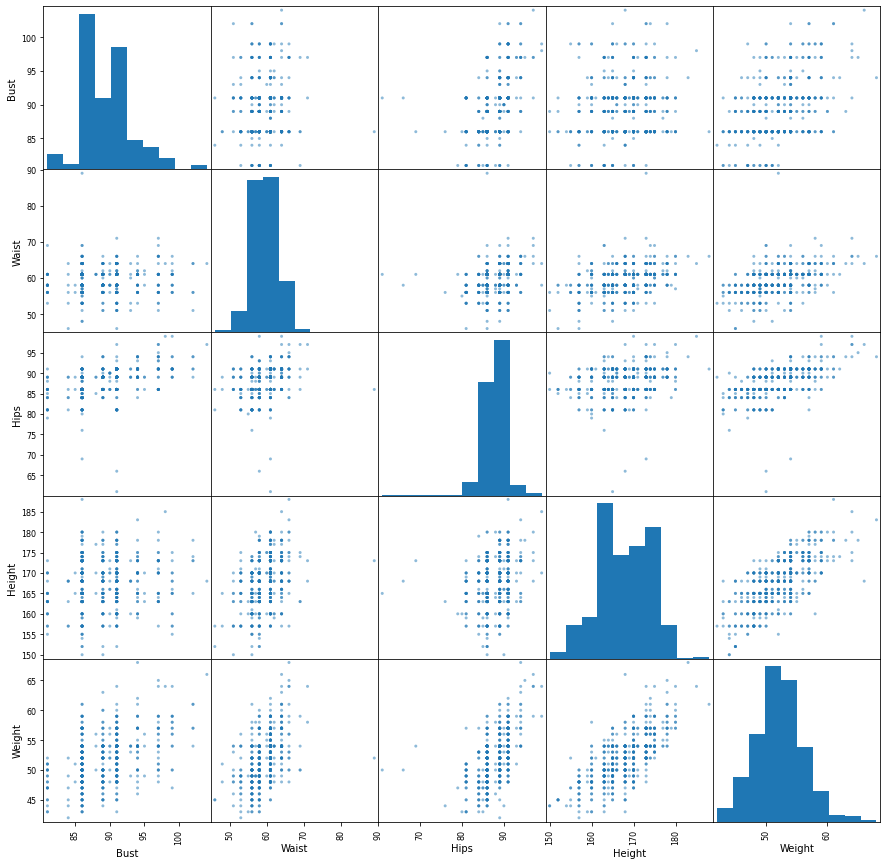

In [4]:
pd.plotting.scatter_matrix(df_playboy[['Bust', 'Waist', 'Hips', 'Height', 'Weight']], 
                  figsize=(15, 15))
plt.show()

<AxesSubplot:>

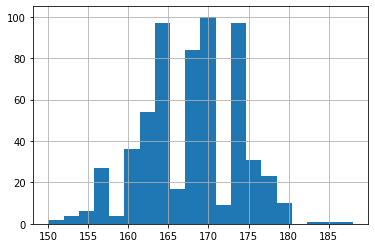

In [7]:
df_playboy['Height'].hist(bins=20)

<AxesSubplot:title={'center':'Waist'}, xlabel='Month'>

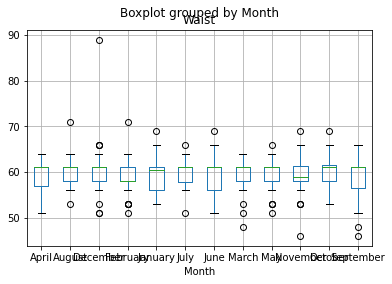

In [8]:
df_playboy.boxplot(column='Waist', by='Month')

Желающие могут ознакомиться с примером анализа данных - решением задачи поиска аномалий в этом датасете, в статье Ю. Кашницкого на "Хабре": https://habr.com/ru/post/251225/

__ПРАКТИКА__

Загрузите датасет "toy_budget.csv". Он содержит информацию по доходам и расходам подразделений компании по месяцам. Прямой доход имеет параметр "Type" = "Income". Внутренние расходы компании имеют тип "Costs".

В продолжении задания из предыдущего модуля, выведите суммы прямого дохода за год по каждому подразделению и по каждому месяцу.

Также выведите суммы внутренних расходов компании.

Следующая задача будет состоять в том, чтобы реализовать распределение внутренних расходов компании среди "зарабатыващих" подразделений (признак "Div"). По правилам компании, они должны распределяться пропорционально  ежемесячным доходам подразделений.

Для начала добавьте в dataframe строки с распределениями расходов, которые соответствуют следующим требованиям:
 - они привязаны к зарабатывающим подразделениям ("Div" соответствуют "Div" соответствующих подразделений), 
 - "Type" = "Intercompany"
 - "Account" = "Intercompany Cost"
 - суммы по месяцам соответствуют общим расходам компании, распределенным по "зарабатывающим" подразделениям пропорционально их доходам в данном месяце, взятым со знаком "минус".

То есть в сумме по месяцам это распределение должно полностью компенсироваться позициями с типом "Costs".

Следующий шаг - разбейте эти добавленные позиции на расходы по каждой статье их "Costs" и добавьте их с типом "Intercompany", "Account" - соответствует  статье из "Account" распределяемых записей типа "Costs".

Проверьте себя, суммы по всему датафрейму должны соответствовать доходам компании ("Type" = "Income").

Как обычно в этом курсе, избегайте использования циклов!

_Подсказка:_ вычисляйте распределения на базе матрицы весовых коэффициентов.


In [ ]:
months = ['apr',
 'may',
 'jun',
 'jul',
 'aug',
 'sep',
 'oct',
 'nov',
 'dec',
 'jan',
 'feb',
 'mar',]

df_toy_budget = pd.read_csv('data/toy_budget.csv', sep=';', index_col=0)
df_toy_budget

In [ ]:
df_budget_pivoted = ?
df_budget_pivoted_income = ?

In [ ]:
# выведите суммы здесь

In [12]:
# выполните рассчет распределения всех расходов здесь

In [13]:
# выполните рассчет распределения расходов по каждой статье здесь

In [14]:
# проверьте себя здесь